# Пример использования History Callback для визуализации процесса обучения нейросети

Документация по [History Callback](https://keras.io/callbacks/#history) на сайте Keras.

In [1]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import utils
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

C:\Users\sozyk\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Загружаем данные MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Преобразуем данные в нужный формат

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

# Создаем нейронную сеть

In [6]:
model = Sequential()

In [7]:
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

Компилируем сеть

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Запускаем обучение нейронной сети

In [9]:
history = model.fit(X_train, Y_train, batch_size=200, epochs=25, validation_split=0.2, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 4s - loss: 0.3210 - acc: 0.9085 - val_loss: 0.1637 - val_acc: 0.9532
Epoch 2/25
 - 1s - loss: 0.1299 - acc: 0.9630 - val_loss: 0.1120 - val_acc: 0.9664
Epoch 3/25
 - 1s - loss: 0.0848 - acc: 0.9761 - val_loss: 0.0958 - val_acc: 0.9713
Epoch 4/25
 - 1s - loss: 0.0596 - acc: 0.9834 - val_loss: 0.0840 - val_acc: 0.9753
Epoch 5/25
 - 1s - loss: 0.0431 - acc: 0.9880 - val_loss: 0.0793 - val_acc: 0.9770
Epoch 6/25
 - 1s - loss: 0.0311 - acc: 0.9918 - val_loss: 0.0820 - val_acc: 0.9768
Epoch 7/25
 - 1s - loss: 0.0244 - acc: 0.9937 - val_loss: 0.0746 - val_acc: 0.9769
Epoch 8/25
 - 1s - loss: 0.0179 - acc: 0.9958 - val_loss: 0.0744 - val_acc: 0.9790
Epoch 9/25
 - 1s - loss: 0.0129 - acc: 0.9973 - val_loss: 0.0732 - val_acc: 0.9797
Epoch 10/25
 - 1s - loss: 0.0094 - acc: 0.9985 - val_loss: 0.0698 - val_acc: 0.9793
Epoch 11/25
 - 1s - loss: 0.0071 - acc: 0.9989 - val_loss: 0.0727 - val_acc: 0.9800
Epoch 12/25
 - 1s - loss: 0.0051 - 

## Исследуем объект History

Состав словаря History

In [10]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Печатаем значения аккуратности на обучающем наборе данных

In [11]:
print(history.history['acc'])

[0.9084583309168617, 0.9630416651566823, 0.9760833442211151, 0.9834375128149986, 0.9880000106990338, 0.9917916744947434, 0.9937083393335342, 0.9958125039935112, 0.9972708359360695, 0.9985416680574417, 0.9988541677594185, 0.9995208337903023, 0.9995416671037674, 0.9997916668653488, 0.9998750001192093, 0.9999166667461395, 1.0, 0.9999583333730697, 0.9969166696071625, 0.9940625056624413, 0.9980416685342789, 0.9997916668653488, 1.0, 1.0, 1.0]


Печатаем значения аккуратности на тестовом проверочном наборе данных

In [12]:
print(history.history['val_acc'])

[0.9532499978939692, 0.966416671872139, 0.971250006556511, 0.9753333429495493, 0.9770000110069911, 0.9768333405256271, 0.9769166777531306, 0.9790000100930532, 0.9796666751305262, 0.9793333421150844, 0.9800000101327896, 0.98008334338665, 0.9799166758855183, 0.9817500094572703, 0.9805833439032237, 0.9819166779518127, 0.9821666757265727, 0.9820833424727122, 0.9755833446979523, 0.9784166773160299, 0.980416676402092, 0.9824166754881541, 0.9830000092585881, 0.9822500089804331, 0.9830833415190379]


## Визуализируем историю обучения сети

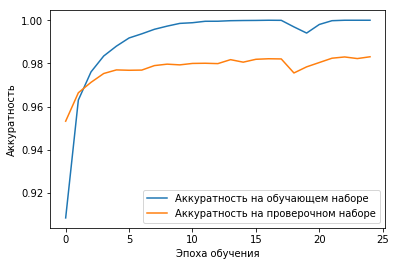

In [13]:
plt.plot(history.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

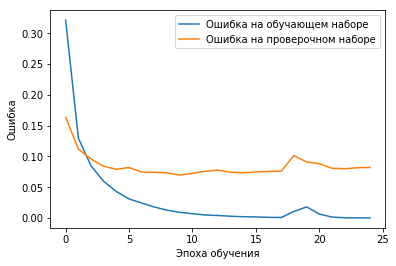

In [14]:
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()